# Step 0. Definition

In [2]:
#import dtnmonitor_v2 as dtn
import dtn_module.dtnmonitor_v3  as DtnModule
import os,sys
import getpass
import subprocess

dtn = DtnModule.DTNMonitor()

user=getpass.getuser()

DtnModule.show_interface()

## this is necessary to show exec info in notebook
def exec_print(command):
    process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
    for line in iter(process.stdout.readline, b''):
        # system print
        sys.stdout.write(line)   

Network Interface                        IP                   
lo0                                      127.0.0.1            
en0                                      165.124.158.60       


# Step 1. Parameter Setting

In [3]:
########## Necessary
###  SELECT THE MONITOR NETWORK INTERFACE
## used in Step 1,2,3 , if you don't know the interface name, you can use 'all'
## make sure the interface is correct, error_naming or without network flow will get empty grath
#dtn.interface = 'eth0.1301'
dtn.interface = 'en0'
#dtn.interface = 'all'

###  Iperf3 SERVER IP 
## used in Step 2,3 : input iperf3 server's ip
iperf3_server="10.250.38.52"

########## Optional
###  Iperf3 THREADS
## used in Step 2,3 :input threads number
count = 4

###  Period Time
test_time="2000" # second

###  iperf parameter
window_size="1M" # M,K

### select graph_mode [0|1] 
#graph_mode=1  # 0=all, 1=100pt
graph_mode=0  

print('You select ..... {:40s} '.format(dtn.interface))


You select ..... en0                                      


# Step 2. Test network transfer by memory

In [4]:

command = ""
for i in range(count):
     command += "iperf3 -w "+window_size+" -Z -t "+test_time+"s -p 5500"+str(i + 1)+ " -c "+ iperf3_server +" & "
print("== Command is as below: == ")
print(command)

== Command is as below: == 
iperf3 -w 1M -Z -t 2000s -p 55001 -c 10.250.38.52 & iperf3 -w 1M -Z -t 2000s -p 55002 -c 10.250.38.52 & iperf3 -w 1M -Z -t 2000s -p 55003 -c 10.250.38.52 & iperf3 -w 1M -Z -t 2000s -p 55004 -c 10.250.38.52 & 


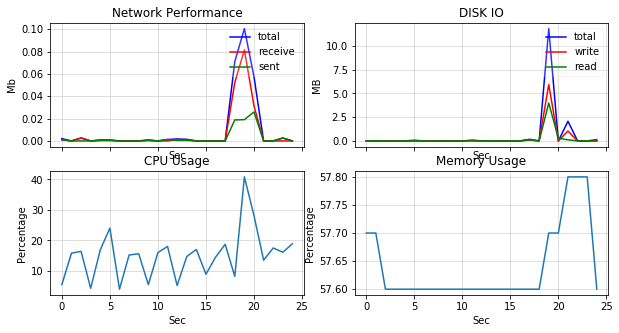

In [5]:
#os.system(command)
dtn.run_monitor(timeout=int(test_time) + 5 )
 

## Step A . stop the Iperf3 server

In [6]:
dtn.stop()

exec_print("killall -u "+user+" iperf3")

No matching processes belonging to you were found


## Step B . check Iperf3 server status

In [7]:
exec_print("ps -u "+ user +" ux |grep iperf3")

ps: illegal argument: ux
usage: ps [-AaCcEefhjlMmrSTvwXx] [-O fmt | -o fmt] [-G gid[,gid...]]
          [-g grp[,grp...]] [-u [uid,uid...]]
          [-p pid[,pid...]] [-t tty[,tty...]] [-U user[,user...]]
       ps [-L]
